[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/07_epidemic/model_epidemic_1d.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate1D(n, nc, pt):
    """Package the simulation steps of intializng the population
    vector and iterating the epidemic and census functions unit I=0
    the censuses are accumulated in a results matrix

    Args:
        n (int): time
        nc (numpy.ndarray): population
        pt (float): parameter value

    Returns:
        tt (list): time
        results (list): sir subpopulation at each time
        
    """
    
    t = 0
    # Set up an intial population of susceptibles
    pop = initial1D(n, 0, 0)
    
    # Put an infected individual in the middle
    pop[int(n / 2) - 1] = 'i'
    s, i, r = census1D(pop)
    # Start the results mnatrix
    results = [[s, i, r]]
    tt = [t]
    
    while i > 0:
        pop = epidemic1D(nc, pt, pop)
        s, i, r = census1D(pop)
        results.append([s, i, r])
        t += 1
        tt.append(t)
        
    return tt, results

In [3]:
def initial1D(s0, i0, r0):
    """Set an initial population vector for the epidemic simulation;
    each state subpopulation is appended to the growing vector, pop
    
    NOTE: if position in the array is important,eg. if you are modeling
    local neighborhood contacts, each individual must be placed 
    randomly in the array

    Args:
        s0 (int): initial population of susceptibles
        i0 (int): initial population of infectious
        r0 (int): initial population of recovered

    Returns:
        list: net population vector of subpopulation of each state
        
    """
    
    pop = []
    for i in range(s0):
        pop.append('s')
    for i in range(i0):
        pop.append('i')
    for i in range(r0):
        pop.append('r')
        
    return pop

In [4]:
def census1D(pop):
    """Count the number of s, i and r cells in pop

    Args:
        pop (list): net population vector of subpopulation of each state

    Returns:
        s (int): number of susceptibles
        i (int): number of infectious
        r (int): number of recovered
        
    """
    
    s = 0
    i = 0
    r = 0
    # pop is a 1 by n array 
    n = np.array(pop).shape[0]
    
    for j in range(n):
        if pop[j]=='s':
            s += 1
        elif pop[j]=='i':
            i += 1
        elif pop[j]=='r':
            r += 1
            
    return s,i,r

In [5]:
def epidemic1D(nc, pt, pop1):
    """Calculate a new pop2 vector of 's', 'i', and 'r' from 
    the current pop1 assuming that all 'i' cells go to 'r' 
    after each has nc random infectious contacts with other 
    cells. An 's' cell goes to 'i' with probability, pt, if 
    it is contacted by an 'i'

    Args:
        nc (int): all 'i' cells go to 'r' after random 
                  infectious contacts with other cells
        pt (float): probability of 's' cell going to 'i'
        pop1 (list): current net population vector

    Returns:
        list: new net population vector
        
    """
    
    pop2 = pop1.copy() # Set up new vector
    n = np.array(pop1).shape[0]
    for j in range(n):
        if pop1[j]=='i':
            for c in range(nc): # nc contact
                k = j
                while k==j: # try to generate a random k NOT equal to j
                    k = np.random.randint(n) # random individual to contact
                if pop1[k]=='s' and np.random.rand()<pt: # rand<pt generates a Bernoulli trial
                    pop2[k] = 'i' # infect the 's' cell
            pop2[j] = 'r' # then the jth individual recovers  
            
    return pop2

In [6]:
tt,results=simulate1D(9999,4,0.5)
results=np.array(results) # change results to numpy.ndarray for plotting purposes

In [7]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

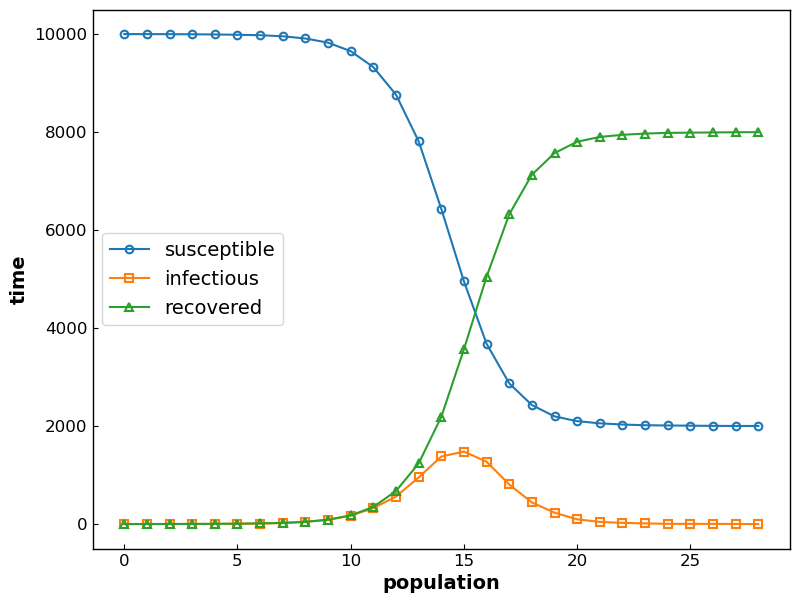

In [8]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(tt, results[:,0], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='susceptible')
ax.plot(tt, results[:,1], '-s', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='infectious')
ax.plot(tt, results[:,2], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5,  label='recovered')

# Set axes labels and legends
ax.set_xlabel('population')
ax.set_ylabel('time')
ax.legend(loc='center left')

plt.show()

## Probabilistically

In [ ]:
# Set the number of repetitions and steps / repetition
n_reps = 5000
n_steps = 10001
step_size = 100

# Array to store population numbers at every time step
pops = np.zeros((int(n_steps / step_size), n_reps))

# Iterate over number of repetitions
for rep in range(n_reps):
    # Simulate the stochastic logistic equation, using section 3.4
    N = np.zeros(n_steps)
    N[0] = 3
    t = 0
    dt = 10**(-3)

    # Think about what happens if dt is too large, and why?
    while t < n_steps - 1 and N[t] > 0:
        r = np.random.rand(1)
        # Birth happens
        if r < lam * N[t] * dt:
            N[t + 1] = N[t] + 1
        # Death happens
        elif r < (lam * N[t] + mu * N[t] * (N[t] - 1)) * dt:
            N[t + 1] = N[t] - 1
        # No birth or death
        else:
            N[t + 1] = N[t]
        t += 1
        if t % 100 == 0:
            pops[int(t / step_size - 1)][rep] = N[t]
        
# Plotting
fig = plt.figure(figsize=(40, 40))
for i in range(10):
    for j in range(10):
        ax = plt.subplot2grid((10, 10), (i, j))
        ax.hist(pops[10 * i + j])